In [1]:
#Dependencies

import requests
import json
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
age_file = "suicide-death-rate-by-age.csv"
sr_by_age = pd.read_csv(age_file)
sr_by_age.head()

,Entity,Code,Year,"All ages (per 100,000)","70+ years old (per 100,000)","50-69 years old (per 100,000)","15-49 years old (per 100,000)","5-14 years old (per 100,000)","Age-standardized (per 100,000)"
0,Afghanistan,AFG,1990,5.895373,18.010179,8.941423,11.099777,0.410967,9.210877
1,Afghanistan,AFG,1991,6.011665,18.072845,9.158262,11.214831,0.414742,9.344000
2,Afghanistan,AFG,1992,6.130514,17.993764,9.364500,11.330904,0.418220,9.469053
3,Afghanistan,AFG,1993,6.244526,18.095485,9.550515,11.444176,0.423134,9.581032
4,Afghanistan,AFG,1994,6.402756,18.294775,9.807171,11.668494,0.432550,9.778655


In [3]:
#step1 = sr_by_age.groupby (by = "Entity", as_index = True)
#step2 = step1.sum()

In [4]:
#step2#.columns

In [5]:
step1 = sr_by_age[(sr_by_age['Year'] == 2000) | (sr_by_age['Year'] == 2010) | (sr_by_age['Year'] == 2015)]
step1.reset_index(inplace = True)
step1.head()

,index,Entity,Code,Year,"All ages (per 100,000)","70+ years old (per 100,000)","50-69 years old (per 100,000)","15-49 years old (per 100,000)","5-14 years old (per 100,000)","Age-standardized (per 100,000)"
0,10,Afghanistan,AFG,2000,6.627822,19.050460,10.332551,12.216295,0.429288,10.263789
1,20,Afghanistan,AFG,2010,6.479521,20.399820,10.330032,11.788987,0.380752,10.151342
2,25,Afghanistan,AFG,2015,6.704211,20.146881,10.275797,11.655039,0.462305,10.133863
3,37,Albania,ALB,2000,5.584430,8.891786,6.302860,8.166355,0.703493,5.935824
4,47,Albania,ALB,2010,6.667050,10.123944,7.151608,8.571616,0.991047,6.382372


In [6]:
step1 = step1.drop(["index", "Code","All ages (per 100,000)"], axis=1)
step2 = step1.rename(columns = {"Entity" : "Country", "70+ years old (per 100,000)" : "70+",
                               "50-69 years old (per 100,000)" : "50-69",
                               "15-49 years old (per 100,000)" : "15-49",
                               "5-14 years old (per 100,000)" : "5-14",
                               "Age-standardized (per 100,000)" : "Age-standardized"})
step2.head()


,Country,Year,70+,50-69,15-49,5-14,Age-standardized
0,Afghanistan,2000,19.050460,10.332551,12.216295,0.429288,10.263789
1,Afghanistan,2010,20.399820,10.330032,11.788987,0.380752,10.151342
2,Afghanistan,2015,20.146881,10.275797,11.655039,0.462305,10.133863
3,Albania,2000,8.891786,6.302860,8.166355,0.703493,5.935824
4,Albania,2010,10.123944,7.151608,8.571616,0.991047,6.382372


In [7]:
step3 = step2.groupby(by = ["Country"], as_index = True)
step4 = step3.sum()
step4.head()

,Year,70+,50-69,15-49,5-14,Age-standardized
Country,,,,,,
Afghanistan,6025,59.597161,30.938380,35.660322,1.272346,30.548994
Albania,6025,28.440555,20.246626,24.462944,2.465123,18.071137
Algeria,6025,18.958949,13.475690,15.042717,0.732727,11.455080
American Samoa,6025,34.469222,23.039687,28.933607,1.436972,21.782754
Andean Latin America,6025,30.759129,21.869385,21.240253,2.760179,16.861334


In [8]:
step5 = step4.sort_values(["Age-standardized"], ascending=False)
step5.reset_index(inplace=True)
step6 = step5.head()

In [9]:
#top_5_sr_age_countries = list(step6['Country'])
#top_5_sr_age_countries
#Hand Picked from Suicide Rate by Gender Plots
top_sr_all_gender_countries_2015_2010_2000 = ["Guyana", "Cote d'Ivoire", "Suriname", "India", "China", "Nepal", "Kazakhstan", "Belarus"]

  Country    Year      5-14      15-49      50-69        70+
0  Guyana  2000.0  2.079268  33.563531  31.136222  33.477146
1  Guyana  2010.0  3.271158  47.218490  37.748982  46.015850
2  Guyana  2015.0  3.067226  42.177543  37.139758  42.598923


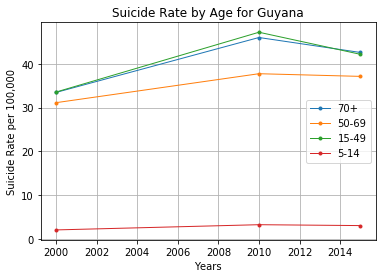

         Country    Year      5-14      15-49      50-69        70+
0  Cote d'Ivoire  2000.0  0.606584  10.030140  32.700915  71.536977
1  Cote d'Ivoire  2010.0  0.566601   9.313889  32.074741  70.063136
2  Cote d'Ivoire  2015.0  0.693695   9.644108  33.040473  71.952177


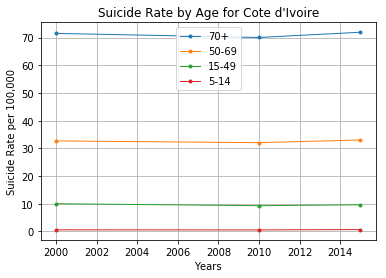

    Country    Year      5-14      15-49      50-69        70+
0  Suriname  2000.0  2.690873  26.113850  27.742018  39.498610
1  Suriname  2010.0  3.194665  32.639895  34.418460  47.792991
2  Suriname  2015.0  2.953341  31.634908  33.620060  46.466348


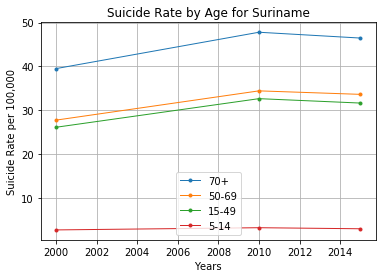

  Country    Year      5-14      15-49      50-69        70+
0   India  2000.0  1.565899  30.456670  21.736883  25.485569
1   India  2010.0  1.189818  26.332028  19.683165  27.871306
2   India  2015.0  1.092575  25.436189  19.593888  28.820390


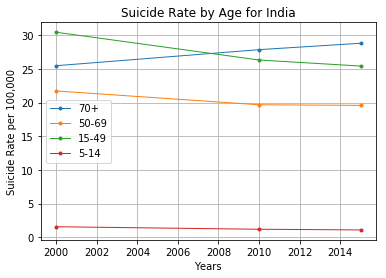

  Country    Year      5-14      15-49      50-69        70+
0   China  2000.0  1.817552  16.174382  26.983490  67.516869
1   China  2010.0  0.989116   8.248625  18.581035  51.055174
2   China  2015.0  0.685962   6.764704  15.270281  39.107877


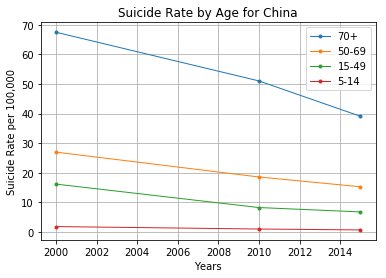

  Country    Year      5-14      15-49      50-69        70+
0   Nepal  2000.0  1.373717  21.105552  14.787795  18.159455
1   Nepal  2010.0  1.104011  17.557813  14.216764  20.218327
2   Nepal  2015.0  0.964178  15.556199  12.155629  18.699558


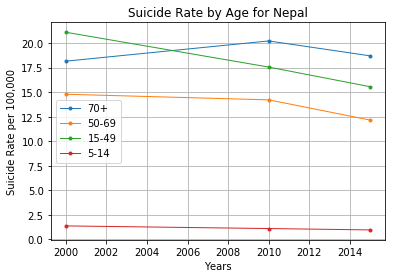

      Country    Year      5-14      15-49      50-69        70+
0  Kazakhstan  2000.0  3.560378  50.738862  54.605664  38.482920
1  Kazakhstan  2010.0  2.641502  42.550757  40.344117  35.793858
2  Kazakhstan  2015.0  1.692708  34.265103  32.563675  32.093402


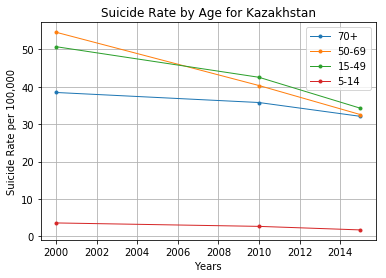

   Country    Year      5-14      15-49      50-69        70+
0  Belarus  2000.0  1.639324  48.077486  61.845512  42.930099
1  Belarus  2010.0  1.064151  39.557150  50.807075  38.968282
2  Belarus  2015.0  0.730673  29.655884  38.631422  34.280606


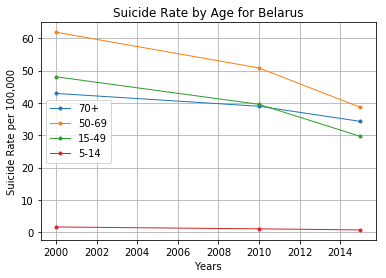

In [10]:
x_axis = step2['Year'].unique()
#for country in list(top_5_sr_age_countries):
for country in list(top_sr_all_gender_countries_2015_2010_2000):
    #print (country)
    df_name = 'sr_age_df_' + country
    #print(df_name)
    df_name = pd.DataFrame()
    for index,row in step2.iterrows():
        if row['Country'] == country:
            df_name = df_name.append({'Country' : row['Country'], 'Year' : row['Year'], '70+' : row['70+'], '50-69' : row['50-69'], '15-49' : row ['15-49'], '5-14' : row ['5-14']}, ignore_index=True)
    df_name = df_name [['Country', 'Year', '5-14', '15-49', '50-69', '70+']]
    print (df_name)
    
    y_age_5_14 = list (df_name['5-14'])
    y_age_15_49 = list (df_name['15-49'])
    y_age_50_69 = list (df_name['50-69'])
    y_age_70plus = list (df_name['70+'])
    
    fig, ax = plt.subplots()

    line1, = ax.plot(x_axis, y_age_70plus, label =  '70+', linewidth=1, marker=".")
    line2, = ax.plot(x_axis, y_age_50_69, label =  '50-69', linewidth=1, marker=".")
    line3, = ax.plot(x_axis, y_age_15_49, label =  '15-49', linewidth=1, marker=".")
    line4, = ax.plot(x_axis, y_age_5_14, label =  '5-14', linewidth=1, marker=".")

    ax.legend(loc='best')
    plt.title(f"Suicide Rate by Age for {country}")
    plt.xlabel("Years")
    plt.ylabel("Suicide Rate per 100,000")
    plt.grid()
    plt.savefig(f"Images/Suicide_Rate_by_Age_for_{country}.png")
    plt.show()
